# Image Classification Using Deep Learning and Tensorflow

We'll read in a dataset of dog images, train a convolutional neural network to classify those images, and improve the model performance. The original data is from Stanford, and it contains images of many dog breeds. In this project, however, we'll use a reduced dataset containing only five breeds.

http://vision.stanford.edu/aditya86/ImageNetDogs/


## Install Packages

In [1]:
%pip install tensorflow # for neural networks
%pip install pandas  # for data manipulation
%pip install Pillow # for image manipulation
%pip install matplotlib # for plotting
%pip install numpy # for numerical operations
%pip install scikit-learn # for machine learning
%pip install pillow # for image manipulation

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [2]:
%pip install tensorflow[and-cuda]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
#unzip folder with data PProject_image classication\dog_images.zip
import zipfile
with zipfile.ZipFile("dog_images.zip", 'r') as zip_ref:
    zip_ref.extractall("dog_images")

    

In [4]:
breeds = ['beagle', 'bernese_mountain_dog', 'doberman', 'labrador_retriever', 'siberian_husky'] # breeds of dogs

In [5]:
# create a dictionary with breed as key and list of images as value
import tensorflow as tf

args = {
    "labels": "inferred",
    "label_mode": "categorical",
    "batch_size": 32,
    "image_size": (256, 256),
    "seed": 1,
    "validation_split": 0.2,
    "class_names": breeds}

In [6]:
# create a training set from the images

train = tf.keras.utils.image_dataset_from_directory( 
    "dog_images/images", 
    subset = "training",
    **args) 

Found 926 files belonging to 5 classes.
Using 741 files for training.


In [7]:
#create a test set from the images 

test = tf.keras.utils.image_dataset_from_directory(
    "dog_images/images",
    subset = "validation",
    **args)

Found 926 files belonging to 5 classes.
Using 185 files for validation.


In [8]:
train  # display the training set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

## Exploring data in tensorflow and keras

In [9]:
first = train.take(1) # take the first batch 
first

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [10]:
images, labels = list (first)[0] # get the first batch

In [11]:
first_image = images[0] # first image in the batch

In [12]:
first_image  # display the first image

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 17.658463,  26.107117,  18.948654],
        [ 25.686066,  24.405075,  20.66211 ],
        [ 29.847656,  24.580734,  21.669708],
        ...,
        [124.332245, 121.332245, 116.332245],
        [122.09987 , 119.09987 , 114.09987 ],
        [120.47656 , 117.47656 , 112.47656 ]],

       [[ 18.993622,  26.708206,  22.481903],
        [ 26.17189 ,  26.147278,  24.414856],
        [ 29.454437,  22.608734,  22.083344],
        ...,
        [121.059235, 118.059235, 113.059235],
        [123.12695 , 120.12695 , 115.12695 ],
        [121.17383 , 118.17383 , 113.17383 ]],

       [[ 17.373474,  24.858932,  23.791443],
        [ 19.348282,  19.05922 ,  20.95375 ],
        [ 25.176407,  18.02797 ,  19.969376],
        ...,
        [123.03125 , 120.03125 , 115.03125 ],
        [124.5918  , 121.5918  , 116.5918  ],
        [122.63867 , 119.63867 , 114.63867 ]],

       ...,

       [[201.      , 206.      , 212.      ],
        [202.

In [13]:
first_image[:3,:3,0] # first 3x3 pixels of the first channel of the first image

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[17.658463, 25.686066, 29.847656],
       [18.993622, 26.17189 , 29.454437],
       [17.373474, 19.348282, 25.176407]], dtype=float32)>

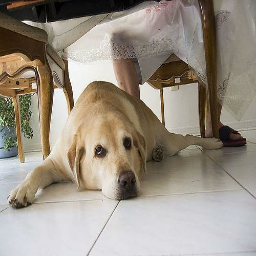

In [14]:
from PIL import Image # import the Image class from the PIL module

Image.fromarray(first_image.numpy().astype("uint8")) # display the first image  

In [15]:
labels[0] # label of the first image

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 1., 0.], dtype=float32)>

## Training a Neural Network with TensorFlow and Keras 

In [16]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE) # Cache and prefetch data  for faster training
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE) # Cache and prefetch data  for faster training

In [17]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Rescaling(1./255), # rescale the pixel values
    layers.Conv2D(16, 3, padding="same", activation='relu', input_shape=(256,256,3)), #16 filters, 3x3 kernel size
    layers.Flatten(), # flatten the output of the convolutional layer
    layers.Dense(128, activation='relu'), # output layer with 5 units
    layers.Dense(len(breeds)) # output layer with 5 units 
])



In [18]:
# compile the model

model.compile(optimizer='adam', # adam optimizer
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), # cross entropy loss
              metrics=['accuracy']) # accuracy metric

In [19]:
#fit the model 
history = model.fit(
    train, 
    validation_data=test, 
    epochs=5,
    verbose=1) # train the model for 10 epochs

Epoch 1/5
24/24 [==============================] - 42s 1s/step - loss: 52.5000 - accuracy: 0.2227 - val_loss: 12.1737 - val_accuracy: 0.2757
Epoch 2/5
24/24 [==============================] - 24s 1s/step - loss: 3.8370 - accuracy: 0.3711 - val_loss: 2.7731 - val_accuracy: 0.2000
Epoch 3/5
24/24 [==============================] - 27s 1s/step - loss: 1.1417 - accuracy: 0.5789 - val_loss: 1.6538 - val_accuracy: 0.2811
Epoch 4/5
24/24 [==============================] - 35s 1s/step - loss: 0.6213 - accuracy: 0.7881 - val_loss: 1.6584 - val_accuracy: 0.3135
Epoch 5/5
24/24 [==============================] - 29s 1s/step - loss: 0.2382 - accuracy: 0.9595 - val_loss: 2.3953 - val_accuracy: 0.2973


In [20]:
model.summary() # print the model summary

Model: "sequential"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 128)               134217856 
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 134218949 (512.00 MB)
Trainable params: 134218949 (512.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

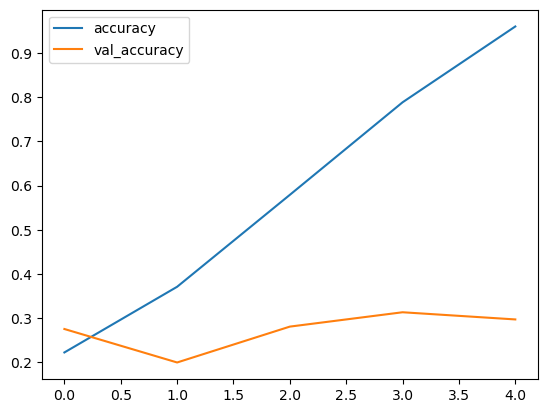

In [21]:
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)     # create a dataframe from the history object
history_df [['accuracy', 'val_accuracy']].plot() # plot the training and validation accuracy


Our model is overfitting the training data. 

## Improving Our Model Accuracy

In [22]:
def train_model(network,epochs=5):
    model = Sequential(network)
    model.compile(optimizer='adam', # adam optimizer
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), # cross entropy loss
              metrics=['accuracy']) # accuracy metric
    
    history = model.fit(
    train,
    validation_data=test,
    epochs=epochs
    ) # train the model for 10 epochs

    history_df = pd.DataFrame.from_dict(history.history)     # create a dataframe from the history object
    return history_df, model # return the dataframe and the model



In [23]:
network = [
    layers.Rescaling(1./255), # rescale the pixel values
    layers.Conv2D(16, 4, padding="same", activation='relu', input_shape=(256,256,3)), #16 filters, 4x4 kernel size - increase window size to capture more features
    
    layers.MaxPooling2D(), # max pooling layer reduces overfitting and makes model run faster
    layers.Conv2D(32, 4, padding="same", activation='relu', input_shape=(256,256,3)), #32 filters, 4x4 kernel size - higher level features
    layers.MaxPooling2D(), 
    layers.Conv2D(64, 4, padding="same", activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D(), 

    layers.Dropout(.2), # dropout layer to reduce overfitting by ransomly setting 20% of the input units to 0 at each update during training
    layers.Flatten(), # flatten the output of the convolutional layer
    layers.Dense(128, activation='relu'), # output layer with 5 units
    layers.Dense(len(breeds)) # output layer with 5 units 
]

history_df, model = train_model(network) # train the model with the new network


Epoch 1/5


24/24 [==============================] - 22s 780ms/step - loss: 1.8121 - accuracy: 0.2051 - val_loss: 1.6047 - val_accuracy: 0.2432
Epoch 2/5
24/24 [==============================] - 27s 1s/step - loss: 1.5647 - accuracy: 0.2780 - val_loss: 1.5926 - val_accuracy: 0.2757
Epoch 3/5
24/24 [==============================] - 27s 1s/step - loss: 1.4206 - accuracy: 0.3927 - val_loss: 1.5695 - val_accuracy: 0.3027
Epoch 4/5
24/24 [==============================] - 24s 984ms/step - loss: 1.1811 - accuracy: 0.5439 - val_loss: 1.5861 - val_accuracy: 0.3351
Epoch 5/5
24/24 [==============================] - 22s 915ms/step - loss: 0.9062 - accuracy: 0.6734 - val_loss: 1.7623 - val_accuracy: 0.3459


<Axes: >

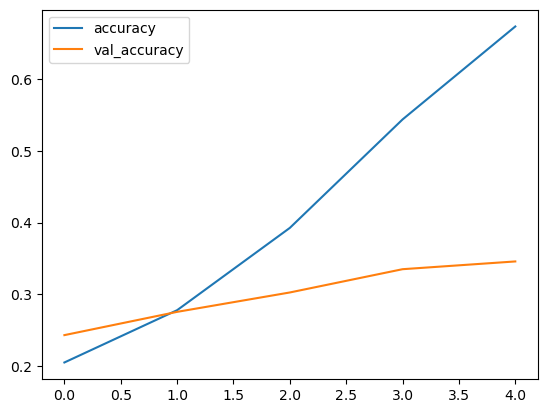

In [24]:


history_df [['accuracy', 'val_accuracy']].plot() # plot the training and validation accuracy


In [25]:
#Try 10 epochs

network = [
    layers.Rescaling(1./255), # rescale the pixel values
    layers.Conv2D(16, 4, padding="same", activation='relu', input_shape=(256,256,3)), #16 filters, 4x4 kernel size - increase window size to capture more features
    
    layers.MaxPooling2D(), # max pooling layer reduces overfitting and makes model run faster
    layers.Conv2D(32, 4, padding="same", activation='relu', input_shape=(256,256,3)), #32 filters, 4x4 kernel size - higher level features
    layers.MaxPooling2D(), 
    layers.Conv2D(64, 4, padding="same", activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D(), 

    layers.Dropout(.2), # dropout layer to reduce overfitting by ransomly setting 20% of the input units to 0 at each update during training
    layers.Flatten(), # flatten the output of the convolutional layer
    layers.Dense(128, activation='relu'), # output layer with 5 units
    layers.Dense(len(breeds)) # output layer with 5 units 
]

history_df, model = train_model(network, epochs=10) # train the model with the new network

Epoch 1/10
24/24 [==============================] - 23s 899ms/step - loss: 1.8730 - accuracy: 0.2281 - val_loss: 1.6002 - val_accuracy: 0.2432
Epoch 2/10
24/24 [==============================] - 20s 834ms/step - loss: 1.5709 - accuracy: 0.2713 - val_loss: 1.5700 - val_accuracy: 0.2865
Epoch 3/10
24/24 [==============================] - 22s 932ms/step - loss: 1.4257 - accuracy: 0.3833 - val_loss: 1.6395 - val_accuracy: 0.2757
Epoch 4/10
24/24 [==============================] - 21s 888ms/step - loss: 1.1771 - accuracy: 0.5304 - val_loss: 1.6862 - val_accuracy: 0.3243
Epoch 5/10
24/24 [==============================] - 20s 843ms/step - loss: 0.8035 - accuracy: 0.6964 - val_loss: 1.7987 - val_accuracy: 0.3243
Epoch 6/10
24/24 [==============================] - 19s 811ms/step - loss: 0.4852 - accuracy: 0.8327 - val_loss: 2.3366 - val_accuracy: 0.3027
Epoch 7/10
24/24 [==============================] - 18s 762ms/step - loss: 0.3107 - accuracy: 0.8988 - val_loss: 2.6483 - val_accuracy: 0.3135

<Axes: >

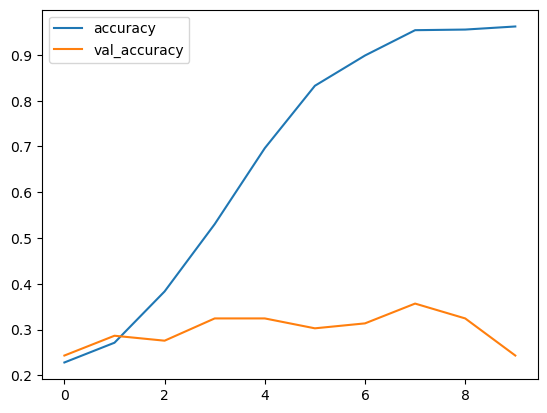

In [26]:

history_df [['accuracy', 'val_accuracy']].plot() # plot the training and validation accuracy

- still issue of overfitting!

## Augmenting Our Data

In [27]:
#add data augmentation - generate more data for neural network to train on

data_augmentation = tf.keras.Sequential([
layers.RandomFlip("horizontal", seed=1), # randomly flip images horizontally
layers.RandomRotation(0.2, seed=1), # randomly rotate images by 20%
layers.RandomZoom(0.2, seed=1) # randomly zoom images by 20% 

])

In [28]:
full_network = [data_augmentation] + network # add data augmentation to the network


In [29]:
history_df, model = train_model(full_network, epochs=5) # train the model with the new network

Epoch 1/5


24/24 [==============================] - 24s 882ms/step - loss: 1.7669 - accuracy: 0.3131 - val_loss: 1.5101 - val_accuracy: 0.3568
Epoch 2/5
24/24 [==============================] - 21s 877ms/step - loss: 1.4939 - accuracy: 0.3239 - val_loss: 1.4572 - val_accuracy: 0.3676
Epoch 3/5
24/24 [==============================] - 20s 848ms/step - loss: 1.4317 - accuracy: 0.3779 - val_loss: 1.4162 - val_accuracy: 0.3892
Epoch 4/5
24/24 [==============================] - 20s 851ms/step - loss: 1.3641 - accuracy: 0.4143 - val_loss: 1.3985 - val_accuracy: 0.4108
Epoch 5/5
24/24 [==============================] - 21s 875ms/step - loss: 1.3843 - accuracy: 0.4305 - val_loss: 1.3858 - val_accuracy: 0.4378


<Axes: >

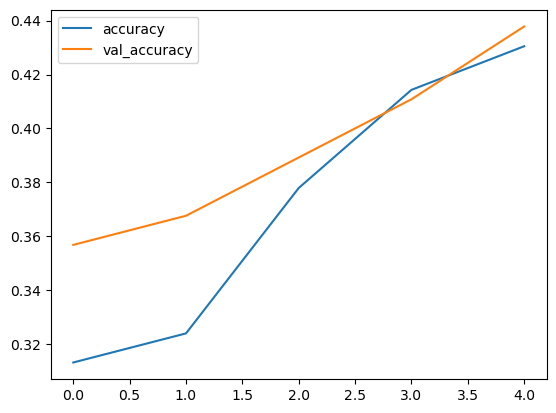

In [30]:
history_df [['accuracy', 'val_accuracy']].plot() # plot the training and validation accuracy

In [31]:
history_df, model = train_model(full_network, epochs=10) # train the model with the new network

Epoch 1/10


24/24 [==============================] - 25s 881ms/step - loss: 1.3667 - accuracy: 0.4399 - val_loss: 1.4071 - val_accuracy: 0.3838
Epoch 2/10
24/24 [==============================] - 21s 859ms/step - loss: 1.3163 - accuracy: 0.4710 - val_loss: 1.3669 - val_accuracy: 0.3946
Epoch 3/10
24/24 [==============================] - 20s 837ms/step - loss: 1.2773 - accuracy: 0.4872 - val_loss: 1.3821 - val_accuracy: 0.3568
Epoch 4/10
24/24 [==============================] - 20s 834ms/step - loss: 1.2310 - accuracy: 0.5020 - val_loss: 1.3691 - val_accuracy: 0.3730
Epoch 5/10
24/24 [==============================] - 20s 845ms/step - loss: 1.2060 - accuracy: 0.5236 - val_loss: 1.3295 - val_accuracy: 0.4432
Epoch 6/10
24/24 [==============================] - 23s 933ms/step - loss: 1.2499 - accuracy: 0.4912 - val_loss: 1.3988 - val_accuracy: 0.3892
Epoch 7/10
24/24 [==============================] - 20s 824ms/step - loss: 1.2066 - accuracy: 0.5115 - val_loss: 1.3723 - val_accuracy: 0.4378
Epoch 8/10

<Axes: >

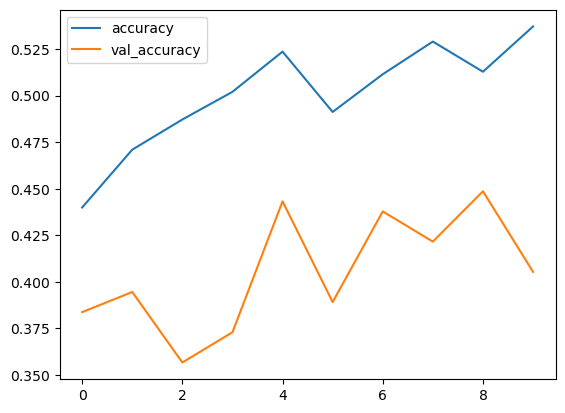

In [32]:
history_df [['accuracy', 'val_accuracy']].plot() # plot the training and validation accuracy

## Investigating Moder Error

In [33]:
#pull predictions out from history_df

preds = model.predict(test) # get the predictions for the test set


6/6 [==============================] - 1s 147ms/step


In [34]:
import numpy as np
predicted_class = np.argmax(preds, axis=1) # get the predicted class

In [35]:
predicted_class

array([0, 1, 1, 2, 0, 2, 3, 2, 2, 1, 2, 3, 0, 4, 2, 1, 0, 4, 1, 1, 2, 2,
       0, 3, 2, 0, 3, 0, 4, 0, 4, 0, 1, 0, 1, 2, 3, 0, 3, 2, 1, 3, 4, 4,
       2, 4, 0, 4, 4, 2, 0, 2, 3, 0, 1, 1, 4, 2, 0, 2, 2, 2, 2, 0, 3, 4,
       3, 0, 0, 4, 4, 2, 2, 3, 0, 2, 1, 2, 0, 0, 3, 0, 4, 4, 2, 2, 2, 4,
       0, 0, 3, 1, 0, 4, 0, 0, 2, 2, 0, 0, 1, 4, 4, 0, 3, 0, 3, 3, 4, 1,
       2, 0, 2, 2, 1, 0, 2, 3, 0, 4, 1, 3, 2, 4, 3, 1, 0, 2, 1, 0, 0, 2,
       0, 4, 3, 0, 0, 1, 1, 4, 1, 2, 3, 2, 4, 1, 0, 1, 2, 1, 2, 2, 4, 1,
       0, 2, 1, 0, 0, 2, 0, 1, 2, 4, 0, 4, 2, 3, 2, 0, 2, 2, 3, 0, 0, 3,
       2, 4, 2, 0, 0, 1, 2, 1, 3], dtype=int64)

In [36]:
actual_labels = np.concatenate([y for x, y in test], axis=0) # get the actual labels from test set

In [37]:
actual_class = np.argmax(actual_labels, axis=1)  # get the actual class 

In [38]:
import itertools

actual_image = [x.numpy().astype("uint8") for x, y in test]  # get the actual images from the test set
actual_image = list(itertools.chain.from_iterable(actual_image)) # flatten the list
actual_image = [Image.fromarray(a) for a in actual_image] # convert the numpy array to an image


In [39]:
actual_class = np.argmax(actual_labels, axis=1) # get the actual class 

In [40]:
pred_df = pd.DataFrame(zip(predicted_class, actual_class, actual_image), columns=["prediction", "actual", "image"]) # create a dataframe with the predictions 

In [41]:
pred_df["prediction"] = pred_df["prediction"].apply(lambda x: breeds[x]) # convert the predicted class to breed
pred_df["actual"] = pred_df["actual"].apply(lambda x: breeds[x]) # convert the actual class to breed 

,prediction,actual,image
0,beagle,siberian_husky,
1,bernese_mountain_dog,bernese_mountain_dog,
2,bernese_mountain_dog,labrador_retriever,
3,doberman,labrador_retriever,
4,beagle,beagle,
5,doberman,labrador_retriever,
6,labrador_retriever,doberman,
7,doberman,doberman,
8,doberman,doberman,
9,bernese_mountain_dog,bernese_mountain_dog,

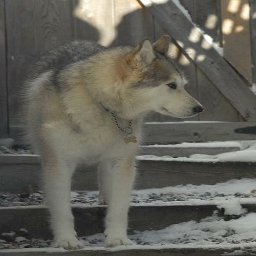
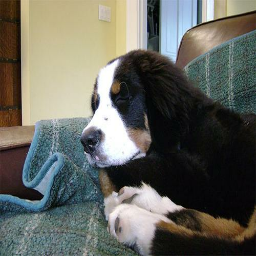
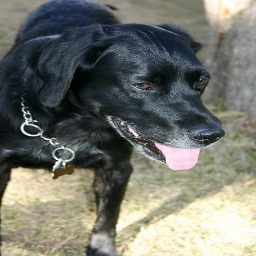
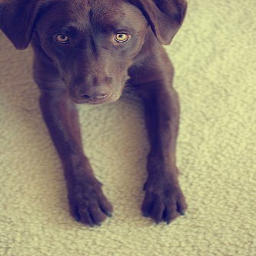
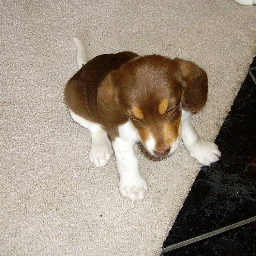
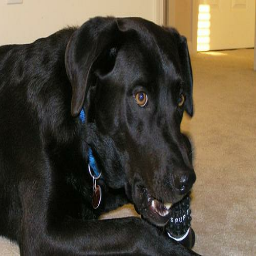
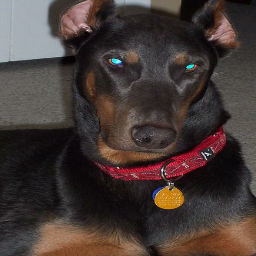
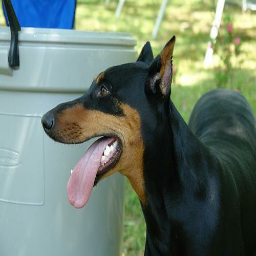
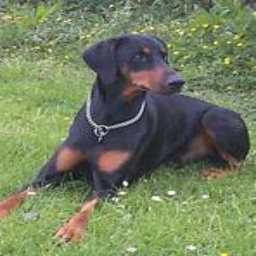
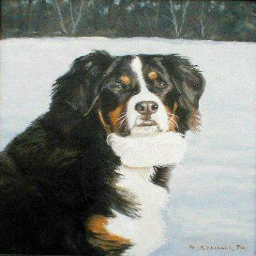

In [42]:
import base64
import io

def image_formatter(img): # function to format the image
    with io.BytesIO() as buffer: # create a buffer to store the image
        img.save(buffer, 'png') # save the image to a buffer
        img_str = base64.b64encode(buffer.getvalue()).decode() # convert the image to a base64 string
        return f'<img src="data:image/jpeg;base64,{img_str}">' # return the formatted image

pred_df.head(10).style.format({'image': image_formatter}) # display the first 10 predictions 

In [43]:
pred_df.head()

,prediction,actual,image
0,beagle,siberian_husky,<PIL.Image.Image image mode=RGB size=256x256 a...
1,bernese_mountain_dog,bernese_mountain_dog,<PIL.Image.Image image mode=RGB size=256x256 a...
2,bernese_mountain_dog,labrador_retriever,<PIL.Image.Image image mode=RGB size=256x256 a...
3,doberman,labrador_retriever,<PIL.Image.Image image mode=RGB size=256x256 a...
4,beagle,beagle,<PIL.Image.Image image mode=RGB size=256x256 a...


## Conclusion and Next Steps

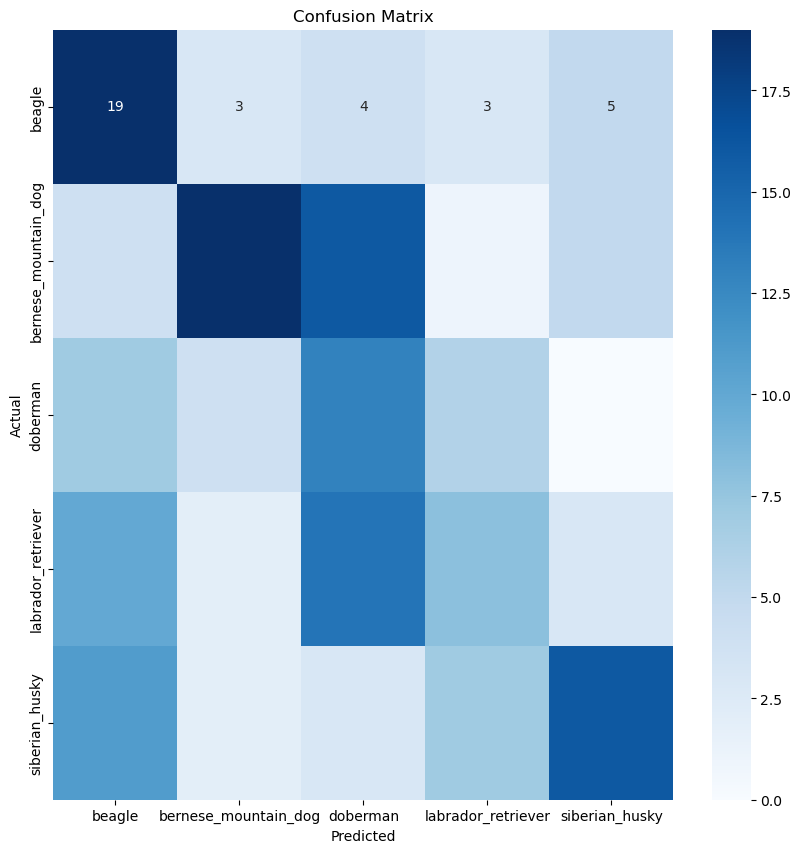

C:\Users\saqib\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
import numpy as np

# Calculate summary statistics
accuracy = np.mean(predicted_class == actual_class) # calculate the accuracy
accuracy

from sklearn.metrics import confusion_matrix

confusion_matrix(actual_class, predicted_class) # create a confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(actual_class, predicted_class) # create a confusion matrix
plt.figure(figsize=(10, 10)) # set the size of the plot
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=breeds, yticklabels=breeds) # plot the confusion matrix
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show() # display the plot

#save the model
model.save("dog_breed_classifier.h5") # save the model


Interpreting the matrix:

Correct predictions: The highest numbers are typically found along the diagonal of the matrix. These represent correct predictions, where the actual breed matches the predicted breed. For instance, the model correctly predicted 19 beagles as beagles and 5 Siberian Huskies as Siberian Huskies.
Misclassifications: The off-diagonal elements indicate incorrect predictions. For example, the model misclassified 4 beagles as Doberman Pinschers.


Insights:

- Beagles: The model seems to perform well at identifying beagles, with most of them being correctly predicted.
- Siberian Huskies: The model also has good accuracy with Siberian Huskies.
- Labrador Retrievers: The model appears to have some difficulty differentiating between Labrador Retrievers and other breeds, as there are several misclassifications.
- Bernese Mountain Dogs and Doberman Pinschers: The model struggles with these breeds, often misclassifying them as other breeds.

- Overall: The confusion matrix suggests that the model has reasonable accuracy for some breeds but could be improved for others, especially Labrador Retrievers, Bernese Mountain Dogs, and Doberman Pinschers. Further analysis and potentially more training data might be needed to address these issues

In [50]:
# % accuracy of the model
accuracy = np.mean(predicted_class == actual_class) # calculate the accuracy
accuracy




0.40540540540540543

- further dogs categories can be added to the model to improve the accuracy of the model
- hyperparameter tuning can be done to improve the accuracy of the model

